Informacje o datasecie:
    ; 6 rodzajów szkła; określone pod względem zawartości tlenku (tj. Na, Fe, K itp.)



1. Numer identyfikacyjny: od 1 do 214
2. RI: współczynnik załamania światła
3. Na: Sód (pomiar jednostkowy: procent masy w odpowiednim tlenku, podobnie jak atrybuty 4–10)
4. Mg: Magnez
5. Al: Aluminium
6. Si: krzem
7. K: potas
8. Ca Wapń
9. BA: bar
10. Fe żelazo
11. typ szkła (atrybut klasy)
- 1 building_windows_float_processed
- 2 building_windows_non_float_processed
- 3 vehicle_windows_float_processed
- 4 vehicle_windows_non_float_processed (brak w ta baza danych)
- 5 pojemnik
- 6 zastawa stołowa
- 7 reflektor




In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.base import TransformerMixin 
from sklearn.preprocessing import (FunctionTransformer, StandardScaler) 
from sklearn.decomposition import PCA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.stats import boxcox 
from sklearn.model_selection import (train_test_split, KFold , StratifiedKFold, 
                                     cross_val_score, GridSearchCV, 
                                     learning_curve, validation_curve) 
from sklearn.pipeline import Pipeline 
from sklearn.base import BaseEstimator, TransformerMixin
from collections import Counter
import warnings
# load models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import (XGBClassifier, plot_importance)
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from time import time

%matplotlib inline 
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

data=pd.read_csv("glasss.csv")

In [2]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [4]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


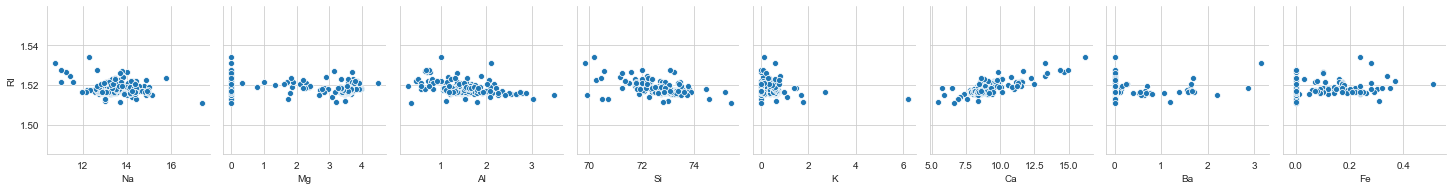

In [5]:
sns.pairplot(data=data, x_vars=['Na','Mg','Al','Si','K','Ca','Ba','Fe' ],y_vars=["RI"])

2. RI: współczynnik załamania światła
3. Na: Sód (pomiar jednostkowy: procent masy w odpowiednim tlenku, podobnie jak atrybuty 4–10)
4. Mg: Magnez
5. Al: Aluminium
6. Si: krzemu
7. K: potasu
8. Ca Wapń
9. BA: baru
10. Fe Iron

<Figure size 720x480 with 0 Axes>

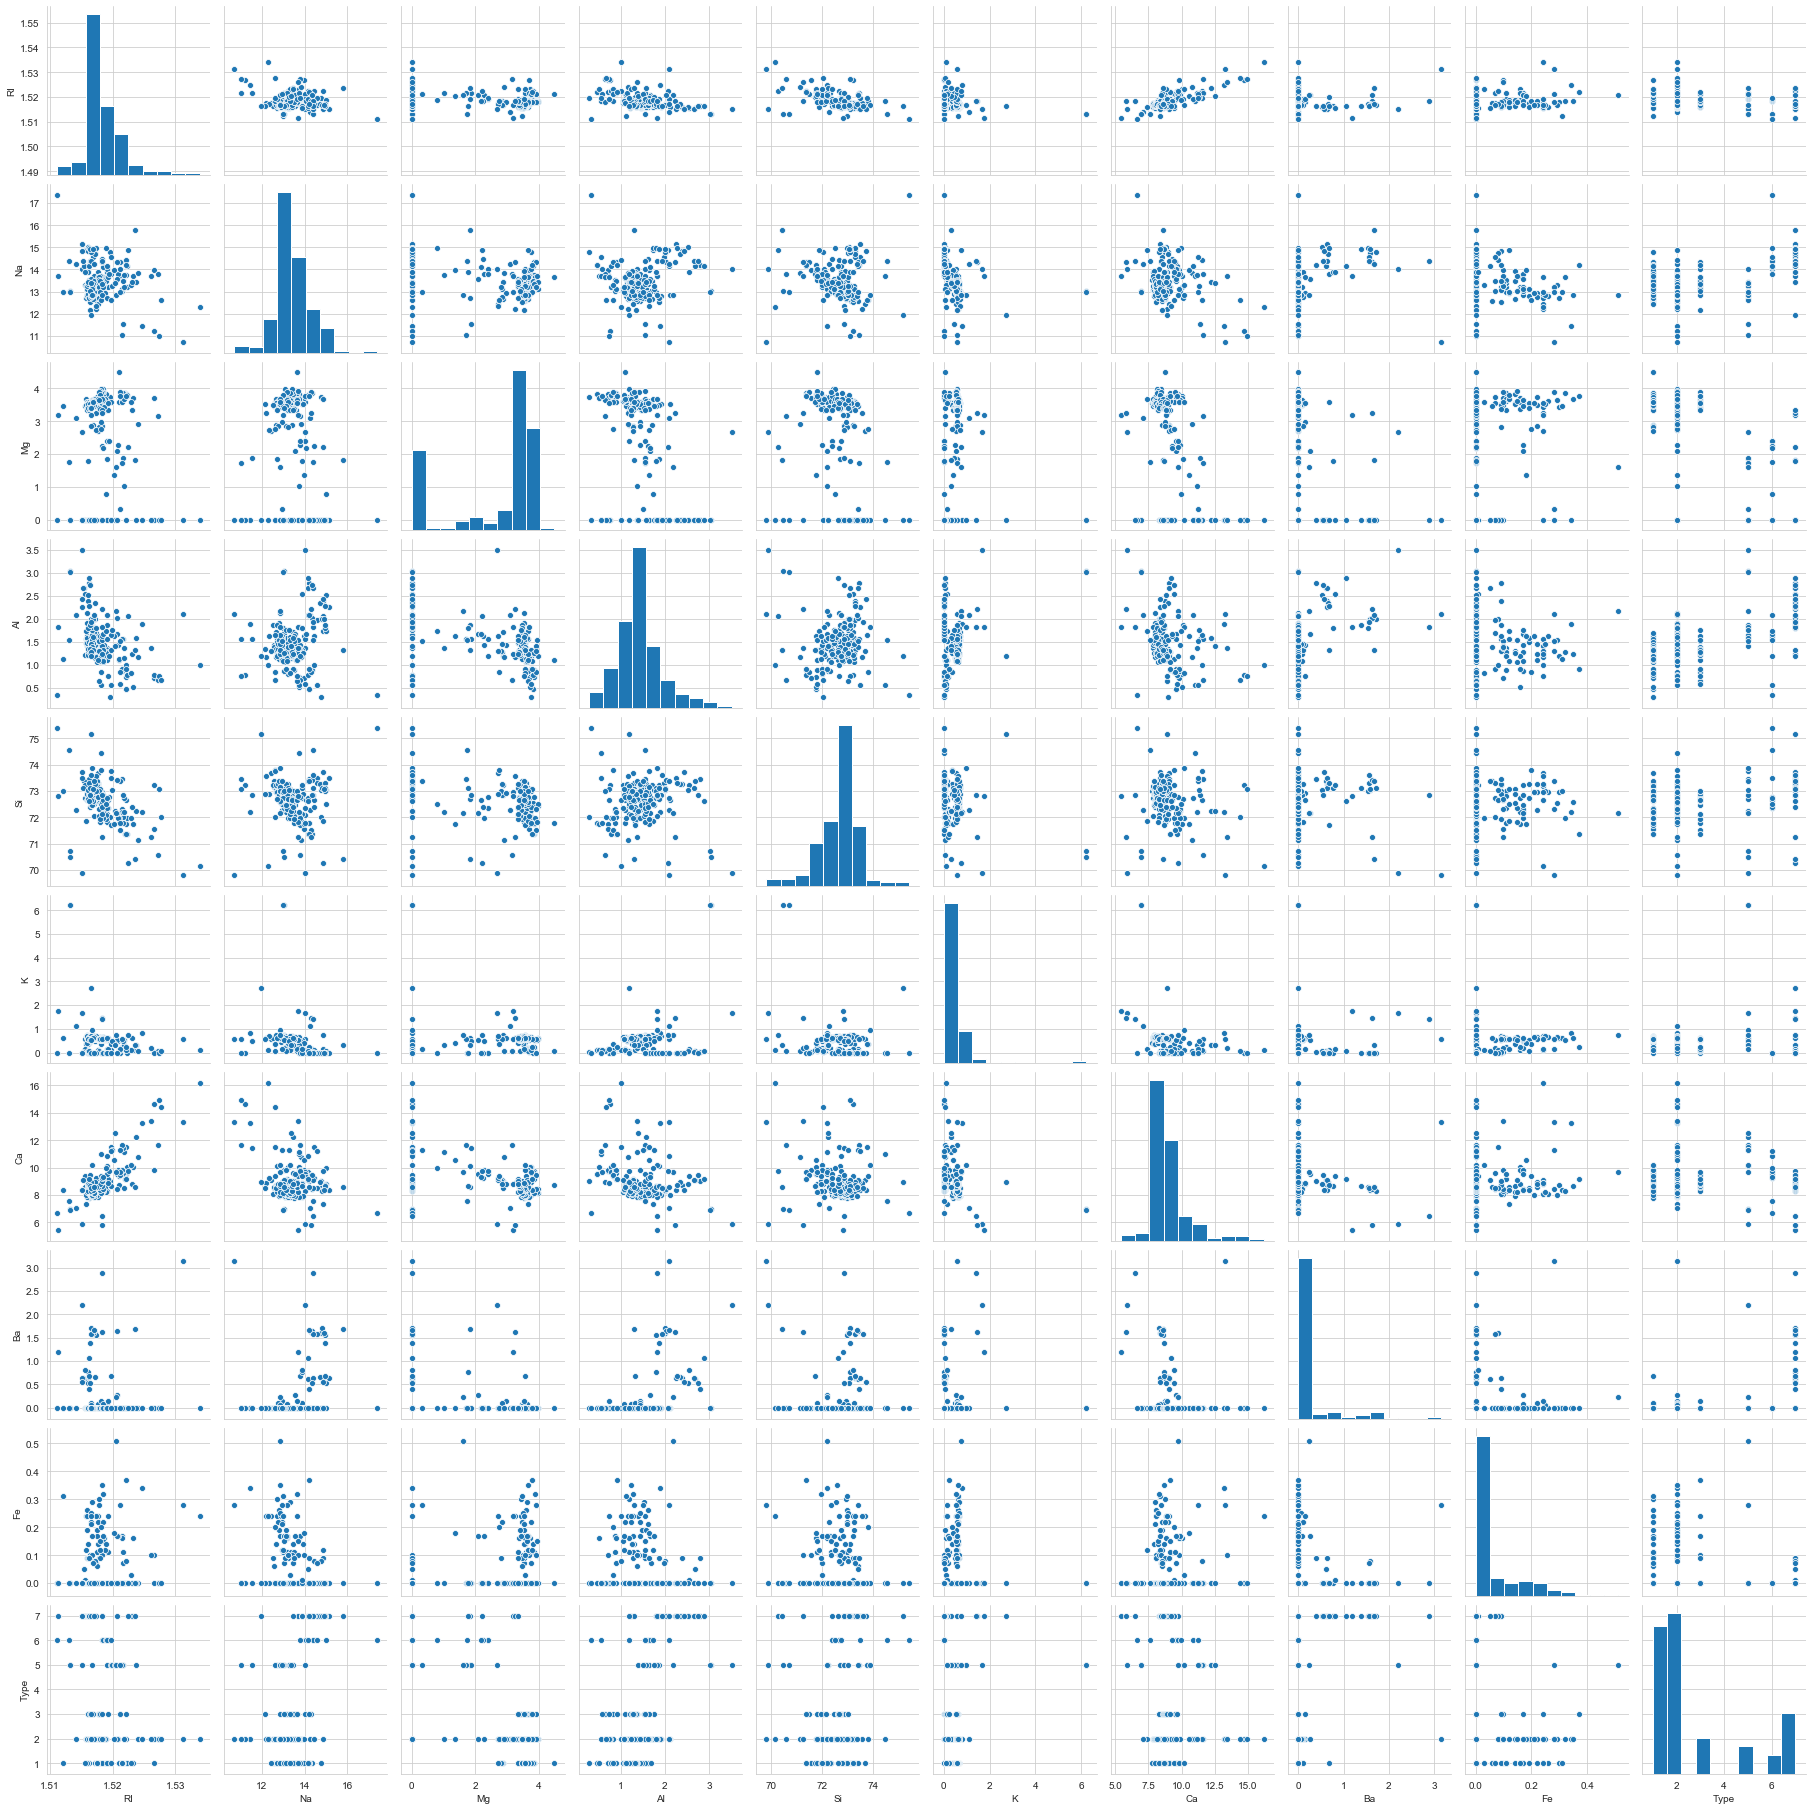

In [6]:
plt.figure(dpi=120)
sns.pairplot(data)
plt.show()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


Dataset jest ok, nie ma wartości brakujących

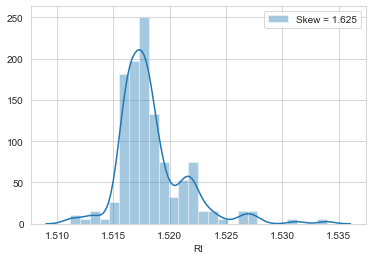

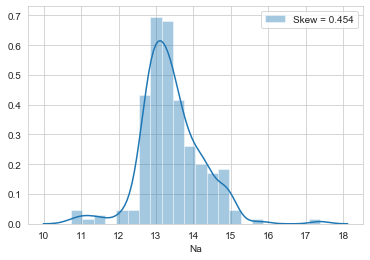

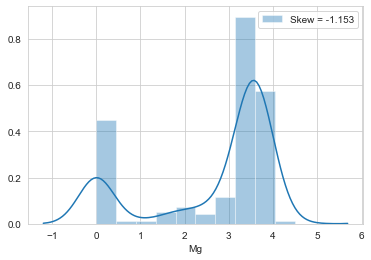

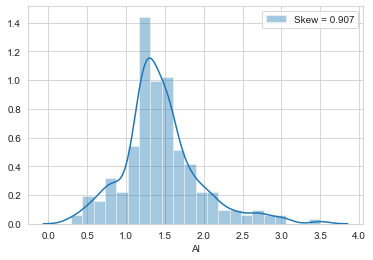

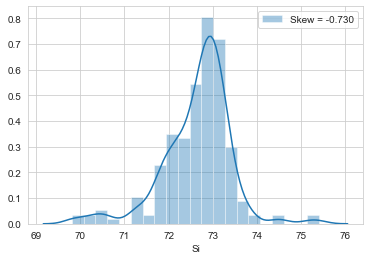

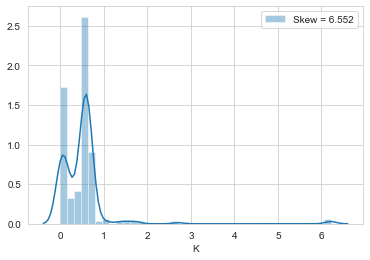

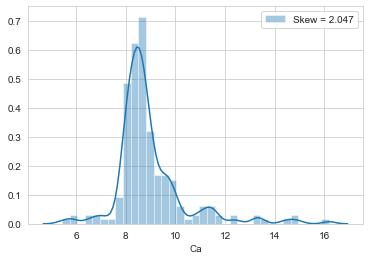

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

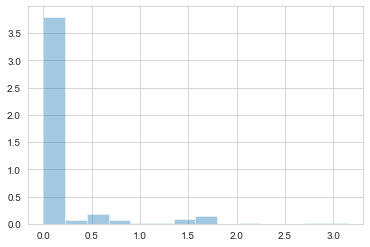

In [8]:
features = data.columns[:-1].tolist()
for feat in features:
    skew = data[feat].skew()
    sns.distplot(data[feat], label='Skew = %.3f' %(skew))
    plt.legend(loc='best')
    plt.show()

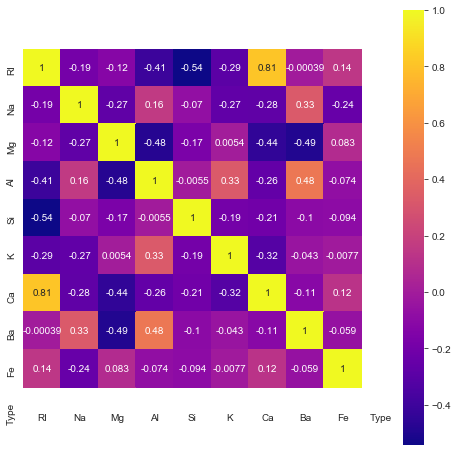

          RI        Na        Mg        Al        Si         K        Ca  \
RI  1.000000 -0.191885 -0.122274 -0.407326 -0.542052 -0.289833  0.810403   
Na -0.191885  1.000000 -0.273732  0.156794 -0.069809 -0.266087 -0.275442   
Mg -0.122274 -0.273732  1.000000 -0.481799 -0.165927  0.005396 -0.443750   
Al -0.407326  0.156794 -0.481799  1.000000 -0.005524  0.325958 -0.259592   
Si -0.542052 -0.069809 -0.165927 -0.005524  1.000000 -0.193331 -0.208732   
K  -0.289833 -0.266087  0.005396  0.325958 -0.193331  1.000000 -0.317836   
Ca  0.810403 -0.275442 -0.443750 -0.259592 -0.208732 -0.317836  1.000000   
Ba -0.000386  0.326603 -0.492262  0.479404 -0.102151 -0.042618 -0.112841   
Fe  0.143010 -0.241346  0.083060 -0.074402 -0.094201 -0.007719  0.124968   

          Ba        Fe  
RI -0.000386  0.143010  
Na  0.326603 -0.241346  
Mg -0.492262  0.083060  
Al  0.479404 -0.074402  
Si -0.102151 -0.094201  
K  -0.042618 -0.007719  
Ca -0.112841  0.124968  
Ba  1.000000 -0.058692  
Fe -0.058692  

In [9]:
corr = data[features].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True,
           xticklabels= data.columns.tolist(), yticklabels= data.columns.tolist(),
           cmap= 'plasma')
plt.show()
print(corr)



Największa korelacja występuje pomiędzy Ca oraz RI

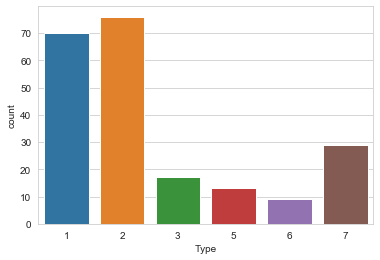

In [10]:
sns.countplot(data['Type'])
plt.show()


- 1 building_windows_float_processed
- 2 building_windows_non_float_processed
- 3 vehicle_windows_float_processed
- 4 vehicle_windows_non_float_processed (brak w tej bazie danych)
- 5 pojemnik
- 6 zastawa stołowa
- 7 reflektor

Najwięcej występujących typów szkła to building_windows_non_float_processed, a następnie building_windows_float_processed

Żadna z funkcji nie jest zwykle dystrybuowana. Cechy Fe, Ba, Ca i K wykazują najwyższe współczynniki skosu.

In [11]:
# Define X as features and y as lablels
X = data[features]
y = data['Type']
# set a seed and a test size for splitting the dataset 
seed = 7
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size , random_state = seed)


In [12]:
features_boxcox = []

for feature in features:
    bc_transformed, _ = boxcox(X_train[feature]+1)  # shift by 1 to avoid computing log of negative values
    features_boxcox.append(bc_transformed)

features_boxcox = np.column_stack(features_boxcox)
data_bc = pd.DataFrame(data=features_boxcox, columns=features)
data_bc['Type'] = data['Type']

In [13]:
data_bc.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.000851,6.837368,15.163989,0.883137,1.023278e+33,0.346637,0.740489,0.000000,0.060026,1
1,0.000851,6.559486,13.326087,0.890167,1.220328e+33,0.362661,0.742602,0.000000,0.055753,1
2,0.000851,7.335807,0.000000,1.101006,1.561029e+33,0.000000,0.741317,0.110014,0.000000,1
3,0.000851,6.602622,13.260442,0.603571,1.134696e+33,0.158890,0.749311,0.000000,0.062052,1
4,0.000851,5.856014,3.677591,0.890167,1.538051e+33,0.362661,0.755970,0.000000,0.000000,1


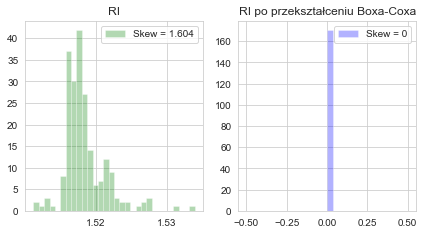

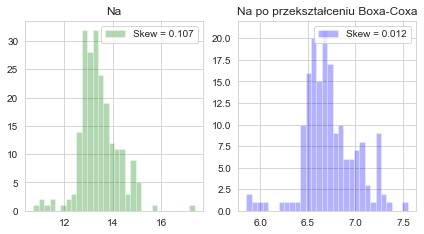

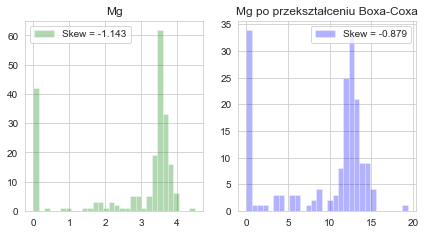

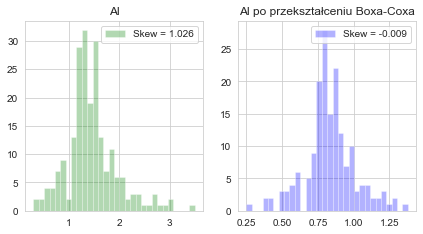

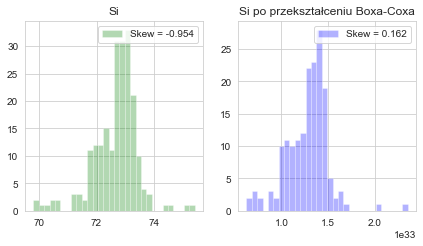

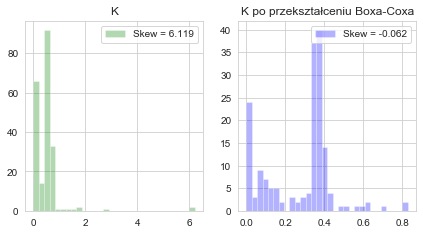

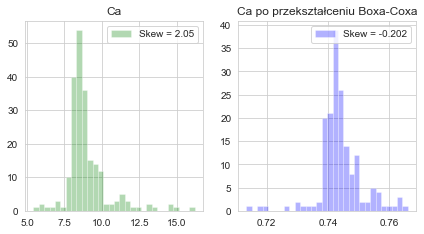

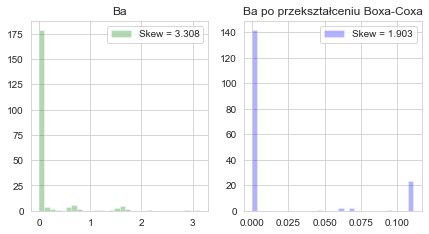

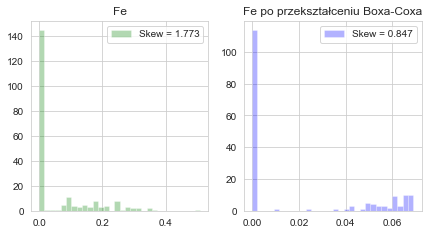

In [14]:
for feature in features:
    fig, ax = plt.subplots(1,2,figsize=(7,3.5))    
    ax[0].hist(data[feature], color='green', bins=30, alpha=0.3, label='Skew = %s' %(str(round(X_train[feature].skew(),3))) )
    ax[0].set_title(str(feature))   
    ax[0].legend(loc=0)
    ax[1].hist(data_bc[feature], color='blue', bins=30, alpha=0.3, label='Skew = %s' %(str(round(data_bc[feature].skew(),3))) )
    ax[1].set_title(str(feature)+' po przekształceniu Boxa-Coxa')
    ax[1].legend(loc=0)
    plt.show()

In [15]:

for feature in features:
    delta = np.abs( data_bc[feature].skew() / data[feature].skew() )
    if delta < 1.0 :
        print('Atrybut %s ma mniejszą skośność po przekształceniu Boxa-Coxa' %(feature))
    else:
        print('Atrybut %s ma większą skośność po przekształceniu Boxa-Coxa'  %(feature))

Atrybut RI ma mniejszą skośność po przekształceniu Boxa-Coxa
Atrybut Na ma mniejszą skośność po przekształceniu Boxa-Coxa
Atrybut Mg ma mniejszą skośność po przekształceniu Boxa-Coxa
Atrybut Al ma mniejszą skośność po przekształceniu Boxa-Coxa
Atrybut Si ma mniejszą skośność po przekształceniu Boxa-Coxa
Atrybut K ma mniejszą skośność po przekształceniu Boxa-Coxa
Atrybut Ca ma mniejszą skośność po przekształceniu Boxa-Coxa
Atrybut Ba ma mniejszą skośność po przekształceniu Boxa-Coxa
Atrybut Fe ma mniejszą skośność po przekształceniu Boxa-Coxa


Po zastosowaniu przekształcenia Boxa-Coxa- skośność została znacząco zredukowana

# Regresja liniowa

In [16]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
from sklearn.metrics import mean_squared_error
predict=lr.predict(X_test)
print(mean_squared_error(predict,y_test))
print(lr.score(X_test,y_test))

0.8981323029881647
0.7488435226519787


# K najbliższych sąsiadów

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [19]:
knn_predict=knn.predict(X_test)
print(knn.score(X_test,y_test))
print(mean_squared_error(knn_predict,y_test))

0.5813953488372093
1.697674418604651


# Drzewo decyzyjne

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
knn_predict=dt.predict(X_test)
print(dt.score(X_test,y_test))
print(mean_squared_error(knn_predict,y_test))

0.5813953488372093
2.046511627906977


# Liniowa analiza dyskryminacyjna

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
knn_predict=lda.predict(X_test)
print(lda.score(X_test,y_test))
print(mean_squared_error(knn_predict,y_test))

0.6046511627906976
1.255813953488372
